<a href="https://colab.research.google.com/github/junsookim76/ChemML/blob/main/RDKIT_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh -q
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local &>/dev/null
!conda install -q -y -c rdkit rdkit python=3.7
!pip install -q mordred seaborn
%matplotlib inline
import sys
import os
sys.path.append('/usr/local/lib/python3.7/site-packages/')
from mordred import Calculator, descriptors
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
IPythonConsole.ipython_useSVG=True

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - python=3.7
    - rdkit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |              mkl           6 KB
    bottleneck-1.3.2           |   py37heb32a55_1         125 KB
    brotlipy-0.7.0             |py37h27cfd23_1003         320 KB
    bzip2-1.0.8                |       h7b6447c_0          78 KB
    ca-certificates-2021.10.26 |       h06a4308_2         115 KB
    cairo-1.16.0               |       hf32fb01_1         1.0 MB
    certifi-2021.10.8          |   py37h06a4308_0         151 KB
    cffi-1.14.6                |   py37h400218f_0         223 KB
    chardet-4.0.0              |py37h06a4308_1003         195 KB
    conda-4.10.3               |   py37h06a4308_0         2.9 MB
    conda-package-handling-1.7.3|   py37h27cfd23_1   

In [3]:
import time
print(time.asctime()) # doctest: IGNORE

Sun Nov 21 22:56:43 2021


# Working with SMILES
### If you have a SMILES string, the easiest thing to use is MolFromSmiles:

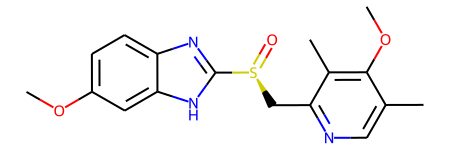

In [4]:
m = Chem.MolFromSmiles('COc1ccc2c(c1)[nH]c(n2)[S@@](=O)Cc1ncc(c(c1C)OC)C')
m

### An atom is represented using its respective atomic symbol. Upper case letters refer to non-aromatic atoms; lower case letters refer to aromatic atoms. -	Single bond. =	Double bond. #	Triple bond. *	Aromatic bond. .	Disconnected structures.

### The structures that are entered using SMILES are hydrogen-suppressed, that is to say that the molecules are represented without hydrogens. The SMILES software understands the number of possible connections that an atom can have. If enough bonds are not identified by the user through SMILES notation, the system will automatically assume that the other connections are satisfied by hydrogen bonds.

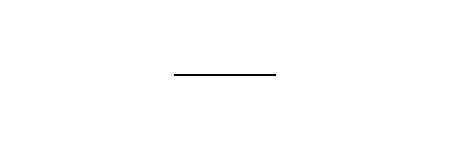

In [12]:
m1 = Chem.MolFromSmiles('CC')
m2 = Chem.MolFromSmiles('C=C')
m3 = Chem.MolFromSmiles('C#N')
m1

### A branch from a chain is specified by placing the SMILES symbol(s) for the branch between parenthesis. The string in parentheses is placed directly after the symbol for the atom to which it is connected. If it is connected by a double or triple bond, the bond symbol immediately follows the left parenthesis. Some examples:

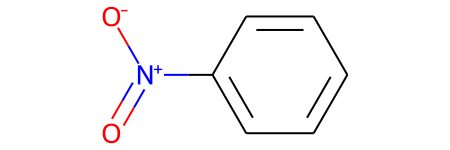

In [19]:
m1 = Chem.MolFromSmiles('CC(O)C')
m2 = Chem.MolFromSmiles('CC(=O)C')
m3 = Chem.MolFromSmiles('CC(CC)C')
m4 = Chem.MolFromSmiles('CC(C)CC(=O)')
m5 = Chem.MolFromSmiles('c1c(N(=O)=O)cccc1')
m6 = Chem.MolFromSmiles('CC(C)(C)CC')
m5

### SMILES allows a user to identify ring structures by using numbers to identify the opening and closing ring atom. For example, in C1CCCCC1, the first carbon has a number '1' which connects by a single bond with the last carbon which also has a number '1'. The resulting structure is cyclohexane. Chemicals that have multiple rings may be identified by using different numbers for each ring. If a double, single, or aromatic bond is used for the ring closure, the bond symbol is placed before the ring closure number. Some examples:

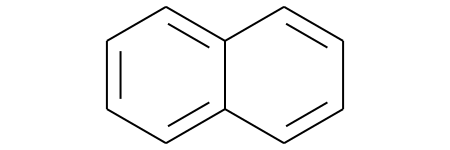

In [30]:
m1 = Chem.MolFromSmiles('C=1CCCCC1')
m2 = Chem.MolFromSmiles('c1ccccc1')
m3 = Chem.MolFromSmiles('C1OC1CC')
m4 = Chem.MolFromSmiles('c1cc2ccccc2cc1')
m5 = Chem.MolFromSmiles('c1c2ccccc2ccc1')
m4

### Charges on an atom can be used to override the knowledge regarding valence that is built into SMILES software. The format for identifying a charged atom consists of the atom followed by brackets which enclose the charge on the atom. The number of charges may be explicitly stated ({-1}) or not ({-}). For example:

In [32]:
m1 = Chem.MolFromSmiles('CCC(=O)O{-1}')
m2 = Chem.MolFromSmiles('CCC(=O)O{-}')
m3 = Chem.MolFromSmiles('c1ccccn{+1}1CC(=O)O')
m2

RDKit ERROR: [00:10:10] SMILES Parse Error: syntax error while parsing: CCC(=O)O{-1}
RDKit ERROR: [00:10:10] SMILES Parse Error: Failed parsing SMILES 'CCC(=O)O{-1}' for input: 'CCC(=O)O{-1}'
RDKit ERROR: [00:10:10] SMILES Parse Error: syntax error while parsing: CCC(=O)O{-}
RDKit ERROR: [00:10:10] SMILES Parse Error: Failed parsing SMILES 'CCC(=O)O{-}' for input: 'CCC(=O)O{-}'
RDKit ERROR: [00:10:10] SMILES Parse Error: syntax error while parsing: c1ccccn{+1}1CC(=O)O
RDKit ERROR: [00:10:10] SMILES Parse Error: Failed parsing SMILES 'c1ccccn{+1}1CC(=O)O' for input: 'c1ccccn{+1}1CC(=O)O'


# Reading Mol file data

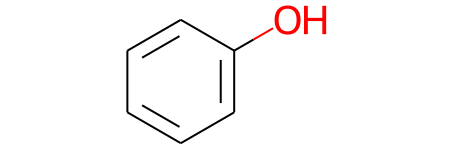

In [33]:
molblock = """phenol
  Mrv1682210081607082D          

  7  7  0  0  0  0            999 V2000
   -0.6473    1.0929    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3618    0.6804    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3618   -0.1447    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.6473   -0.5572    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0671   -0.1447    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0671    0.6804    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7816    1.0929    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  2  3  2  0  0  0  0
  3  4  1  0  0  0  0
  4  5  2  0  0  0  0
  5  6  1  0  0  0  0
  1  6  2  0  0  0  0
  6  7  1  0  0  0  0
M  END
"""
m = Chem.MolFromMolBlock(molblock)
m

### Here the molecule has coordinates that were read in from the Mol block. We can see this because the molecule has a conformer:

In [34]:
m.GetNumConformers()

1

### The conformer that is present is 2D (we can see that from the coordinates above):

In [35]:
m.GetConformer().Is3D()

False

### Here's another Mol block and the corresponding molecule:

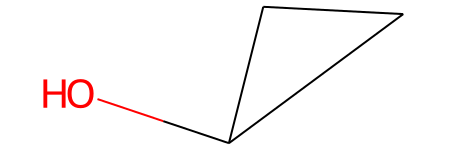

In [36]:
molblock2 ='''cyclopropanol-3D
  Mrv1682210081607153D          

 10 10  0  0  0  0            999 V2000
    0.9159    1.2233    0.2286 C   0  0  1  0  0  0  0  0  0  0  0  0
   -0.0738    1.2748   -0.9428 C   0  0  2  0  0  0  0  0  0  0  0  0
   -0.3167    0.3104    0.2232 C   0  0  2  0  0  0  0  0  0  0  0  0
   -1.3658    0.6623    1.1190 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.8730    0.7413    0.0155 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.8835    2.0739    0.9139 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.2747    0.8266   -1.8737 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7163    2.1557   -0.9817 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.1264   -0.7446    0.0137 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1210    0.2486    1.9735 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  2  3  1  0  0  0  0
  1  3  1  0  0  0  0
  3  4  1  0  0  0  0
  1  5  1  0  0  0  0
  1  6  1  0  0  0  0
  2  7  1  0  0  0  0
  2  8  1  0  0  0  0
  3  9  1  0  0  0  0
  4 10  1  0  0  0  0
M  END
'''
m2 = Chem.MolFromMolBlock(molblock2)
m2

In [37]:
m2.GetConformer().Is3D()

True

### Notice that no Hs were drawn even though there are clearly H atoms in the Mol block. The default behavior for the RDKit Mol block reader is to remove Hs from the input molecule. If we want to keep the Hs and their coordinates, this behavior can be turned off:

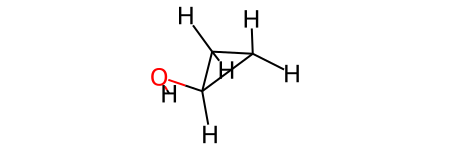

In [38]:
m2_h = Chem.MolFromMolBlock(molblock2,removeHs=False)
m2_h

# Reading PDB data

### This time we'll read from a file instead of embedding the text in the notebook. We also won't try to display the molecule itself, since that isn't particularly informative for a large molecule.

In [ ]:
crn = Chem.MolFromPDBFile('1CRN.pdb')
crn.GetNumAtoms()